In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

In [3]:
df = pd.read_csv("./USA_Housing.csv")

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


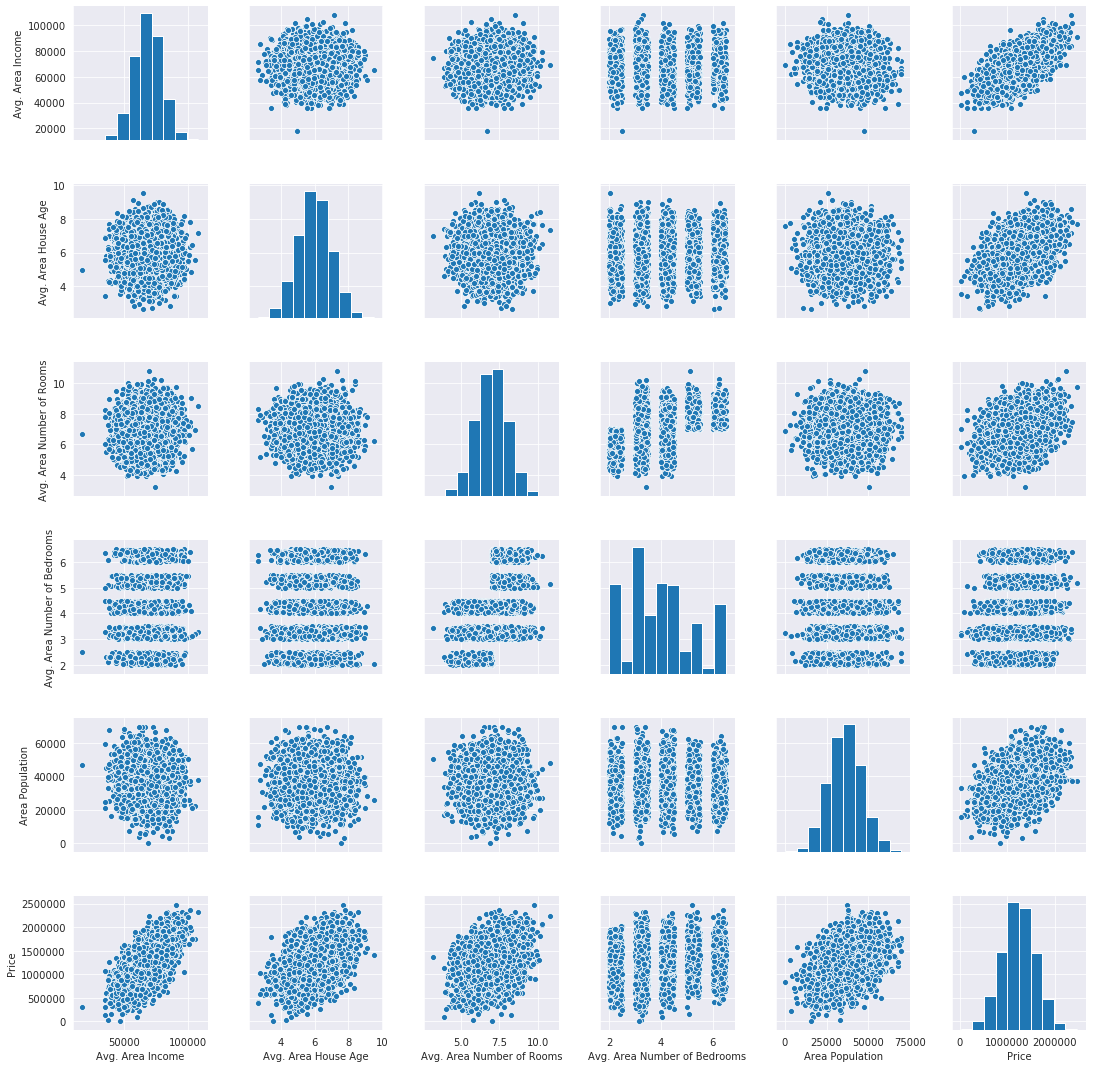

In [6]:
sns.pairplot(df)

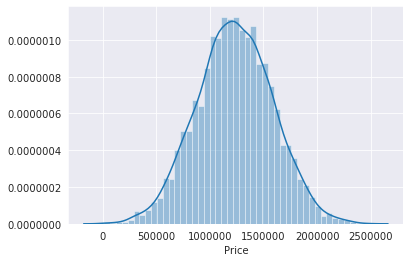

In [7]:
sns.distplot(df["Price"])

## Train Test Split

In [8]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [9]:
# FEATURES
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [10]:
# TARGET VALUE
y = df["Price"]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1303 to 4959
Data columns (total 5 columns):
Avg. Area Income                3000 non-null float64
Avg. Area House Age             3000 non-null float64
Avg. Area Number of Rooms       3000 non-null float64
Avg. Area Number of Bedrooms    3000 non-null float64
Area Population                 3000 non-null float64
dtypes: float64(5)
memory usage: 140.6 KB


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
reg = LinearRegression()

In [16]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
reg.intercept_

-2640159.796851626

In [18]:
reg.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [19]:
cdf = pd.DataFrame(reg.coef_, X.columns, columns=['Coeff'])

In [20]:
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


## Predictions

In [22]:
predictions = reg.predict(X_test)

In [23]:
predictions

array([1260960.70567625,  827588.75560359, 1742421.24254323, ...,
        372191.40626965, 1365217.15140894, 1914519.54178805])

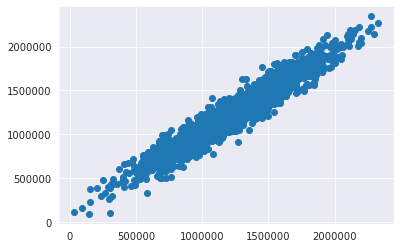

In [24]:
plt.scatter(y_test, predictions)

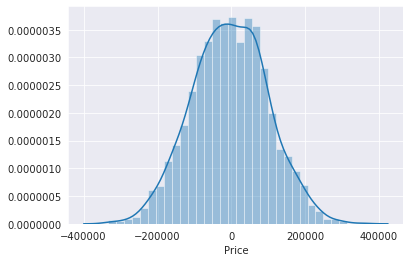

In [25]:
sns.distplot((y_test - predictions))

In [26]:
from sklearn import metrics

In [30]:
# Mean Absolute Error = mean( abs(actual - predictions) )
MAE = metrics.mean_absolute_error(y_test, predictions)
MAE

82288.22251914957

In [31]:
# Mean Squared Error = mean( square(actual - predictions) )
MSE = metrics.mean_squared_error(y_test, predictions)
MSE

10460958907.209684

In [33]:
# Root Mean Squared Error = Square root( mean( square(actual - predictions) ) )
RMSE = np.sqrt(MSE)
RMSE

102278.82922291242